# Unsupervised Learning

In the case of unsupervised learning, we simply have a set of variables $X_1, X_2, \dots, X_n$ and **no response variable** $y$ to explain or predict.

We use unsupervised techniques in order to:


* **Find relationships between variables and/or observations**, e.g. showing joint data interaction between variables


* **Reducing data dimensions**


* **Grouping data** (cluster analysis)


* **Detecting anomalous data**

# Principal Component Analysis (PCA)

PCA is a methodology for performing a **dimensionality reduction** of a dataset by synthetizing relationships between variables and minimizing the resulting loss of informations

Variables are not orthogonal, since they are highly correlated. If we **rotate the coordinate axis** in the direction of greater variability, making those variables **orthogonal** in the new system.

Concretely, we subtract the **mean profile** (the vector of p values for an  hypothetical mean observation in the dataset) from the original dataset.

We are looking for a rotation matrix V which product with the original dataset $X$ will generate a new matrix (dataset) $Z$ as output which satisfies the following conditions:


* The new variables contained in $Z$ will be **orthogonal** with respect to each other. This translates algebrically in $Z^TZ = \Lambda = diag(\lambda_1, \lambda_2, \dots, \lambda_p)$. This represents a dataset in which all variables are independent.


* The variance of variable $n$ in $Z$ should be higher than the one of variable $n - 1$. **This condition makes the first PCs more important than the following ones**.


* The vector of coefficients V should be orthonormal in order to generate a unique solution.


PCA is, in algebric terms, a **spectral decomposition** (diagonalization into eigenvalues) **of the core of sample variance** (matrix of the covariances of our original set of values) ($\tilde{X}^T\tilde{X}$)

The j-th PC is the rotation of the original dataset with respect to the axis $v_j$ (geometrically), the linear combination between centered data matrix $\tilde{X}$ and $v_j$

After performing spectral decomposition, we obtain a diagonal matrix $S = V\Lambda V^T$, having the variances for each PC on the diagonal. The **total variance** is defined as the **trace of this matrix,** $\Sigma_{j =1}^p\lambda_j$

The proportion between each value and the total variance represent **the rate of total variance explained by that PC**. We can sum those rates in order to choose how many PCs to use.

Often we use standardized values of original dataset X in order to simplify the correlation relation between $x_r$ and $z_s$ to $cor(x_r, z_s) = \sqrt{\lambda_s}v_{rs}$

Practically, in order to choose the appropriate number of PC to consider, we can set some guidelines:

* Set a value representing the portion of total variance which should be represented by PCs, or the number of new variables we want for the new dataset.

* Using the **screeplot** of PCs with respect to their variance, stop at the **elbow point** of the variances curve or at the intersection between this curve and the mean variance of PCs.

PCA is a technique for **linear** dimensionality reduction. Components extract the maximum variance from the original variables and are orthogonal with respect to each other.

Critical points of PCA:

* **Difficult to interpret**, PC don't represent concrete variables. A solution could be using sub-optimal, more interpretable components (sca package)

* **Sensible to outliers** because it relies on the variance. pcaMethods package fix this and also allows to perform PCA with missing values.

PCA is not adequate:

* To adress **nonlinear relations between original variables**. There are some nonlinear PCA techniques where variables are transformed beforehand in order to maximize the variance explained by PCs (**optimal scaling**)

* To deal with **non-numerical variables**. In this case, we should use **Multiple correspondence analysis**, which uses the same logic of PCA in order to address categorical values.

# Biplot

It is a **multivariate generalization of a common scatterplot**. If you have more than two variables, biplot provides a joint representation in order to discover relations between variables, between observation and also  between variables and observations. It is a superposition of a graph of points and a graph of axis.


It uses singular value decomposition since it focuses on finding relations between variables and observation (PCA was looking between relations on variables only using $X^TX = V \Lambda V^T$, MDS looks for relations between observations only using $XX^T = U\Lambda U^T$).

## Singular Value Decomposition

It is a more general case of spectral decomposition that can be applied to rectangular matrix. It decomposes the matrix in three components $X = U\Gamma V^T$:

* $V$ is the matrix of orthonormal eigenvectors of $X^TX$. Represents **variables** in the dataset.


* $U$ is the matrix of orthonormal eigenvectors of $XX^T$. Represents **observations** in the dataset.


* $\Gamma$ is the matrix of roots of eigenvalues of X. It represent the relation between $U$ and $V$.

## Infinite Biplots

Using an approximation based on a limited number $k$ of PCs generated from SVD $Y = U_k \Gamma_k V_k^T$, we can decompose $\Gamma$ in $\Gamma = \Gamma_k^\alpha \Gamma_k^{1 - \alpha}$.

By changing the value of $\alpha$ between 0 and 1, we can obtain an infinite number of biplots. If we set $\alpha = 1$ we have normal PCA since 


# Laboratory: PCA on EU data

In [43]:
library(dplyr)  # optional
library(MASS)
library(PerformanceAnalytics)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend



In [20]:
 eu <- read.table("EUdemo.txt", header=TRUE, row.names=1)

In [21]:
eu %>% str
eu %>% head

'data.frame':	41 obs. of  13 variables:
 $ NAT : num  9.65 11.17 12.44 11.15 12.59 ...
 $ MOR : num  9.66 10.27 11.12 9.54 9.16 ...
 $ CR.N: num  -0.0124 0.8996 1.3152 1.6068 3.4264 ...
 $ MIG : num  2.447 1.574 1.766 0.658 0.846 ...
 $ CR.T: num  2.43 2.47 3.08 2.27 4.27 ...
 $ M.IN: num  4.3 5.3 4.2 3.6 4.8 4.7 5.9 5.5 5.2 2.9 ...
 $ VEC : num  92 95 80.6 81.4 84.3 ...
 $ N.FI: num  1.32 1.61 1.73 1.74 1.77 1.36 1.3 1.88 1.22 1.73 ...
 $ E.P : num  28.1 28.5 29.6 29.6 29.3 28.6 28.7 30.5 30 29.4 ...
 $ NU  : num  4.9 4.3 6.7 4.7 4.8 5.2 5.9 4.9 4.8 4.8 ...
 $ E.M : num  27 26.1 29.7 27.7 27.6 26.9 26.5 28.2 27.6 27.4 ...
 $ V.M : num  75.1 74.8 74.2 73.8 74.9 74.5 75.4 73.9 76 74.7 ...
 $ V.F : num  81 81.1 79 81 82.4 80.5 80.4 79 82.1 81.2 ...


,NAT,MOR,CR.N,MIG,CR.T,M.IN,VEC,N.FI,E.P,NU,E.M,V.M,V.F
Austria,9.650613,9.662970,-0.01235674,2.4466343,2.434278,4.3,92.0,1.32,28.1,4.9,27.0,75.1,81.0
Belgio,11.167121,10.267493,0.89962793,1.5743489,2.473977,5.3,95.0,1.61,28.5,4.3,26.1,74.8,81.1
Danimarca,12.437998,11.122802,1.31519615,1.7661205,3.081317,4.2,80.6,1.73,29.6,6.7,29.7,74.2,79.0
Finlandia,11.151013,9.544183,1.60683000,0.6582195,2.265049,3.6,81.4,1.74,29.6,4.7,27.7,73.8,81.0
Francia,12.590642,9.164214,3.42642783,0.8460316,4.272459,4.8,84.3,1.77,29.3,4.8,27.6,74.9,82.4
Germania,9.387304,10.308129,-0.92082545,2.4616247,1.540799,4.7,100.7,1.36,28.6,5.2,26.9,74.5,80.5


In [26]:
rownames(eu)
ind_EU <- which(rownames(eu) == "UE")
ind_EU

[1] "Austria"           "Belgio"            "Danimarca"        
 [4] "Finlandia"         "Francia"           "Germania"         
 [7] "Grecia"            "Irlanda"           "Italia"           
[10] "Lussemburgo"       "Paesi Bassi"       "Portogallo"       
[13] "Regno Unito"       "Spagna"            "Svezia"           
[16] "UE"                "Albania"           "Bielorussia"      
[19] "Bosnia-Erzegovina" "Bulgaria"          "Cipro"            
[22] "Croazia"           "Estonia"           "Islanda"          
[25] "Iugoslavia "       "Lettonia"          "Lituania"         
[28] "Macedonia"         "Malta"             "Moldova"          
[31] "Norvegia"          "Polonia"           "Repubblica ceca"  
[34] "Romania"           "Russia"            "San Marino"       
[37] "Slovacchia"        "Slovenia"          "Svizzera"         
[40] "Turchia"           "Ungheria"

[1] 16

The following objects are masked from eu (pos = 3):

    CR.N, CR.T, E.M, E.P, M.IN, MIG, MOR, N.FI, NAT, NU, V.F, V.M, VEC

The following objects are masked from eu (pos = 4):

    CR.N, CR.T, E.M, E.P, M.IN, MIG, MOR, N.FI, NAT, NU, V.F, V.M, VEC

The following objects are masked from eu (pos = 5):

    CR.N, CR.T, E.M, E.P, M.IN, MIG, MOR, N.FI, NAT, NU, V.F, V.M, VEC

The following objects are masked from eu (pos = 6):

    CR.N, CR.T, E.M, E.P, M.IN, MIG, MOR, N.FI, NAT, NU, V.F, V.M, VEC

The following objects are masked from eu (pos = 7):

    CR.N, CR.T, E.M, E.P, M.IN, MIG, MOR, N.FI, NAT, NU, V.F, V.M, VEC

The following objects are masked from eu (pos = 8):

    CR.N, CR.T, E.M, E.P, M.IN, MIG, MOR, N.FI, NAT, NU, V.F, V.M, VEC

The following objects are masked from eu (pos = 9):

    CR.N, CR.T, E.M, E.P, M.IN, MIG, MOR, N.FI, NAT, NU, V.F, V.M, VEC

The following objects are masked from eu (pos = 10):

    CR.N, CR.T, E.M, E.P, M.IN, MIG, MOR, N.FI, NAT, NU, V.F, V.M, VEC


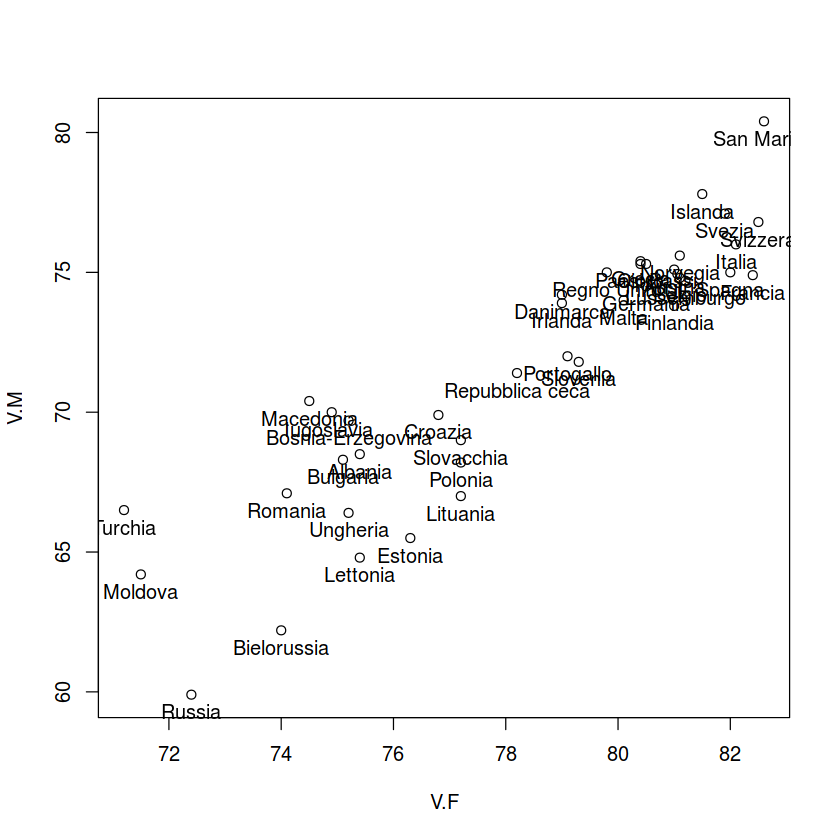

In [41]:
attach(eu)
plot(V.M ~ V.F)
text(V.M ~ V.F, labels=rownames(eu), pos=1)

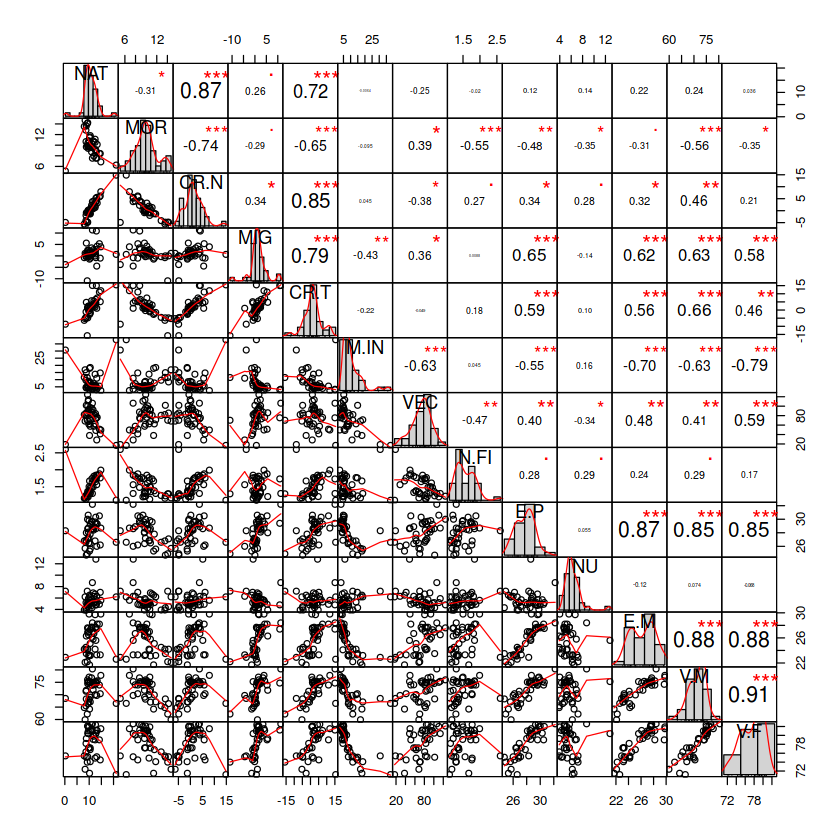

In [45]:
chart.Correlation(eu)

In [46]:
m <- colMeans(eu)

In [50]:
# By column = 2, by row = 1
apply(eu, 2, mean)

NAT        MOR       CR.N        MIG       CR.T       M.IN        VEC 
10.8785456 10.0597582  0.8187874  1.2081583  2.0269457  8.8585366 74.5634146 
      N.FI        E.P         NU        E.M        V.M        V.F 
 1.5079505 28.0496634  5.6584602 25.6877812 71.6424422 78.3257844

In [54]:
# Covariance matrix
S <- cov(eu)
# Correlation matrix
R <- cor(eu)
# Centered matrix (tilde X)
eu.cen <- scale(eu, scale=F)

In [56]:
eu.cen
# Means of columns are now ~= 0
colMeans(eu.cen)

,NAT,MOR,CR.N,MIG,CR.T,M.IN,VEC,N.FI,E.P,NU,E.M,V.M,V.F
Austria,-1.22793261,-0.39678817,-0.831144172,1.2384761,0.4073319,-4.55853659,17.4365854,-0.187950537,0.05033659,-0.75846017,1.31221878,3.4575578,2.6742156
Belgio,0.28857539,0.20773483,0.080840498,0.3661906,0.4470311,-3.55853659,20.4365854,0.102049463,0.45033659,-1.35846017,0.41221878,3.1575578,2.7742156
Danimarca,1.55945239,1.06304383,0.496408718,0.5579623,1.0543710,-4.65853659,6.0365854,0.222049463,1.55033659,1.04153983,4.01221878,2.5575578,0.6742156
Finlandia,0.27246739,-0.51557517,0.788042568,-0.5499387,0.2381038,-5.25853659,6.8365854,0.232049463,1.55033659,-0.95846017,2.01221878,2.1575578,2.6742156
Francia,1.71209639,-0.89554417,2.607640398,-0.3621267,2.2455137,-4.05853659,9.7365854,0.262049463,1.25033659,-0.85846017,1.91221878,3.2575578,4.0742156
Germania,-1.49124161,0.24837083,-1.739612882,1.2534664,-0.4861465,-4.15853659,26.1365854,-0.147950537,0.55033659,-0.45846017,1.21221878,2.8575578,2.1742156
Grecia,-1.19533861,-0.28161717,-0.913720832,1.1651768,0.2514560,-2.95853659,39.0365854,-0.207950537,0.65033659,0.24153983,0.81221878,3.7575578,2.0742156
Irlanda,3.31283839,-1.61947917,4.932317528,4.1169389,9.0492564,-3.35853659,-23.2634146,0.372049463,2.45033659,-0.75846017,2.51221878,2.2575578,0.6742156
Italia,-1.55966361,-0.14760417,-1.412059522,0.5508414,-0.8612181,-3.65853659,49.9365854,-0.287950537,1.95033659,-0.85846017,1.91221878,4.3575578,3.7742156
Lussemburgo,2.07092839,-1.27261517,3.343543478,9.6601502,13.0036937,-5.95853659,0.8365854,0.222049463,1.35033659,-0.85846017,1.71221878,3.0575578,2.8742156


NAT           MOR          CR.N           MIG          CR.T 
 4.982464e-16  8.231898e-16  5.144936e-17  4.061792e-17 -2.166289e-16 
         M.IN           VEC          N.FI           E.P            NU 
 9.098413e-16  3.466062e-16  4.332578e-17  2.599547e-16 -3.791005e-16 
          E.M           V.M           V.F 
-1.039819e-15 -7.105427e-15  6.238912e-15

In [57]:
# See the variances for our values
diag(S)

NAT          MOR         CR.N          MIG         CR.T         M.IN 
  8.53529848   4.55981406  16.96127401  12.67469577  39.47683209  53.04598780 
         VEC         N.FI          E.P           NU          E.M          V.M 
610.79187805   0.09134714   3.04317664   2.40057554   5.38651939  21.65206534 
         V.F 
 10.67211683

We can observe variances are very different for all variables. Knowing that PCA maximizes the variance, it will be highly influenced by the scale used in our variables (in this case, the VEC variable will lead the result).

For this reason we decide to perform PCA on the matrix R, which is basically a standardized version of S to avoid these problems.

# PCA